<a href="https://colab.research.google.com/github/Anshad-Aziz/EY_Intership/blob/main/STU6523e48035c3f1696851072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
import seaborn as sns
from sklearn.metrics import accuracy_score,mean_squared_error,classification_report,confusion_matrix,precision_score,recall_score,roc_curve,auc
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [3]:
data=pd.read_excel('/content/health care diabetes.xlsx')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [9]:
#Identifying the mean of the features
print(data['Glucose'].mean())
print(data['BloodPressure'].mean())
print(data['SkinThickness'].mean())
print(data['Insulin'].mean())

120.89453125
69.10546875
20.536458333333332
79.79947916666667


In [10]:
# Finding the number of rows which has the null values
print('Glucose-',len(data['Glucose'][data['Glucose']==0]))
print('BloodPressure-',len(data['BloodPressure'][data['BloodPressure']==0]))
print('SkinThickness-',len(data['SkinThickness'][data['SkinThickness']==0]))
print('Insulin-',len(data['Insulin'][data['Insulin']==0]))

Glucose- 5
BloodPressure- 35
SkinThickness- 227
Insulin- 374


In [11]:
# Finding the null value percentage
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin']
null_percentage = (data[selected_columns] == 0).mean() * 100

# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column:")
print(null_percentage)

Percentage of Null Values for Each Column:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


In [12]:
#Checking the null value percentage of the treated columns
null_percentage_treated = (data[selected_columns] == 0).mean() * 100

# Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column after the null value treatment:")
print(null_percentage_treated)

Percentage of Null Values for Each Column after the null value treatment:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


In [13]:
#Checking the null value percentage of the treated columns
null_percentage_treated = (data[selected_columns] == 0).mean() * 100
 # Displaying the null value percentage for each selected column
print("Percentage of Null Values for Each Column after the null value treatment:")
print(null_percentage_treated)
columns=data[selected_columns]

Percentage of Null Values for Each Column after the null value treatment:
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


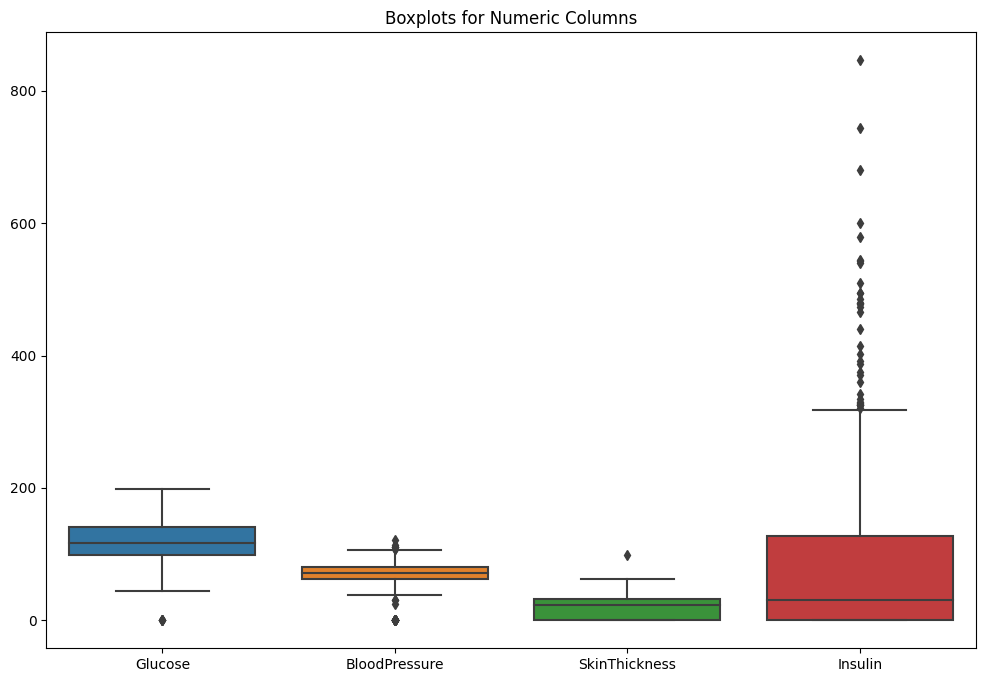

In [14]:
# Display boxplots for numeric columns to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=columns)
plt.title("Boxplots for Numeric Columns")
plt.show()

In [15]:
# Finding the Outlier Count in the selected Columns:
def find_outliers_iqr(data, column_name):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    # Count the number of outliers
    count_outliers = len(outliers)

    return count_outliers

# Calculate and print the number of outliers for each column of interest
for column_name in selected_columns:
    outlier_count = find_outliers_iqr(data, column_name)
    print(f"Number of outliers in the '{column_name}' column: {outlier_count}")

Number of outliers in the 'Glucose' column: 5
Number of outliers in the 'BloodPressure' column: 45
Number of outliers in the 'SkinThickness' column: 1
Number of outliers in the 'Insulin' column: 34


In [16]:
sorted(data)
Q1=data.quantile(0.20)
Q3=data.quantile(0.80)
IQR=Q3-Q1
print(IQR)

Pregnancies                   6.0000
Glucose                      52.0000
BloodPressure                22.0000
SkinThickness                35.0000
Insulin                     150.0000
BMI                          11.9000
DiabetesPedigreeFunction      0.4676
Age                          19.6000
Outcome                       1.0000
dtype: float64


In [17]:
data_cleared_iqr=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]
data_cleared_iqr
print(data_cleared_iqr.shape)
print(data.shape)

(681, 9)
(768, 9)


In [18]:
data_cleared_iqr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
col=data_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin']]

In [20]:
type(col)

pandas.core.frame.DataFrame

In [21]:
col.head()

,Glucose,BloodPressure,SkinThickness,Insulin
0,148,72,35,0
1,85,66,29,0
2,183,64,0,0
3,89,66,23,94
5,116,74,0,0


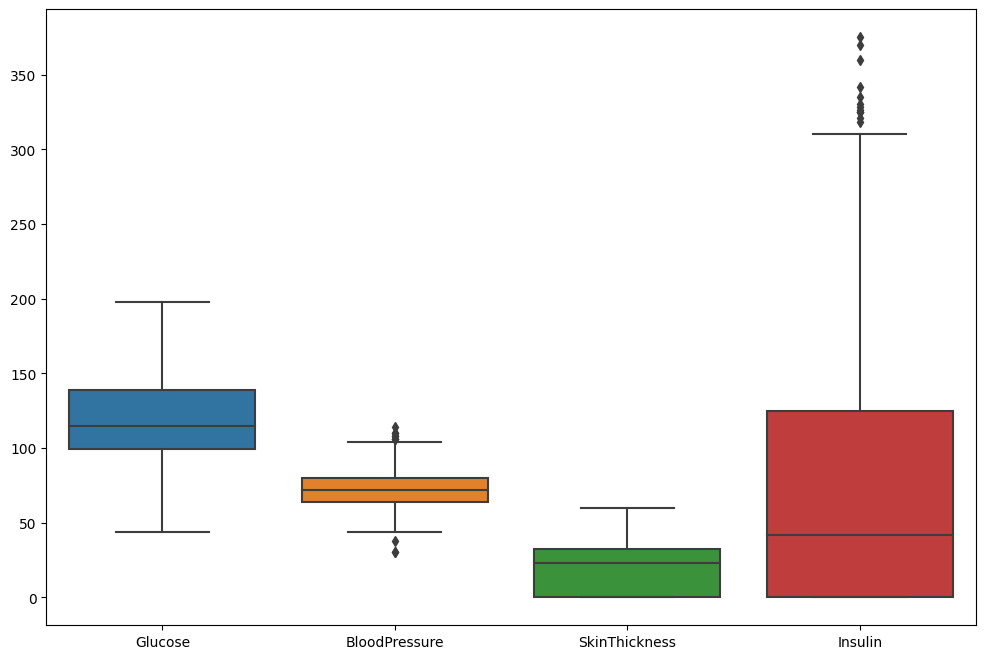

In [22]:
plt.figure(figsize=(12,8))
sns.boxplot(data=col)
plt.show()

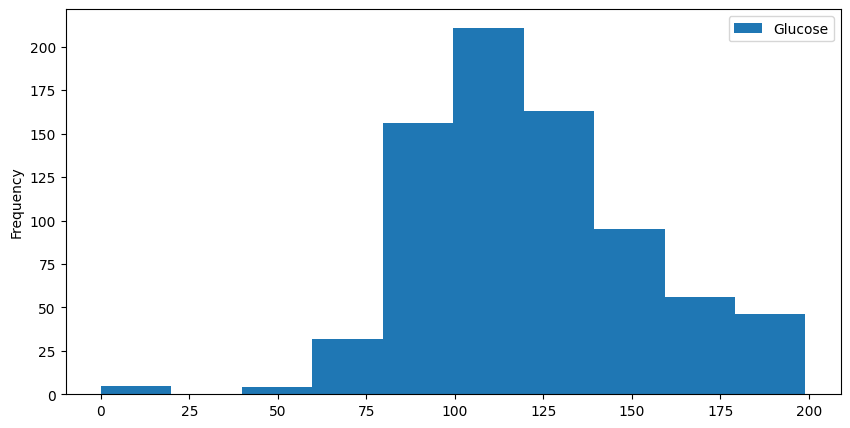

In [23]:
data['Glucose'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()


In [24]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


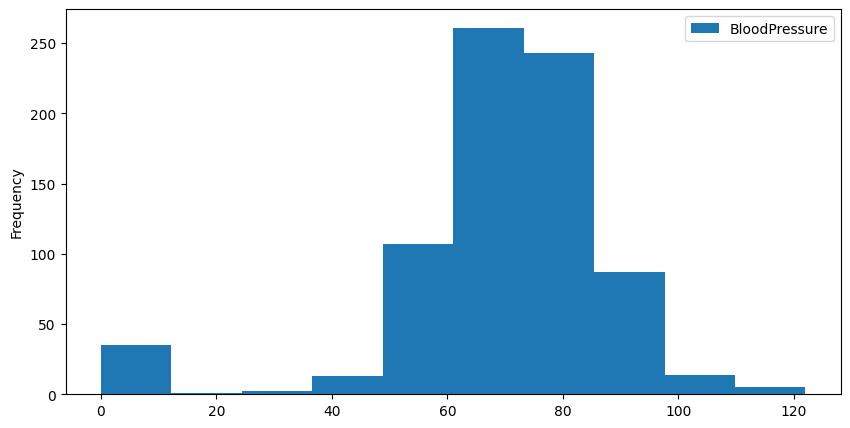

In [25]:
data['BloodPressure'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

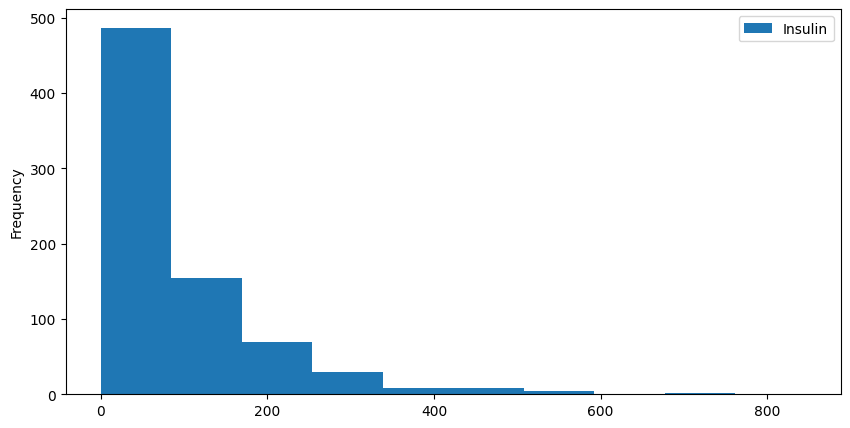

In [26]:
data['Insulin'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

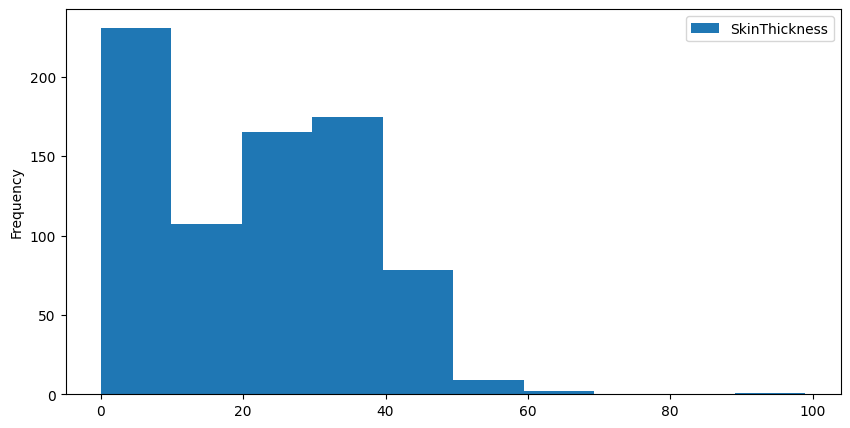

In [27]:
data['SkinThickness'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

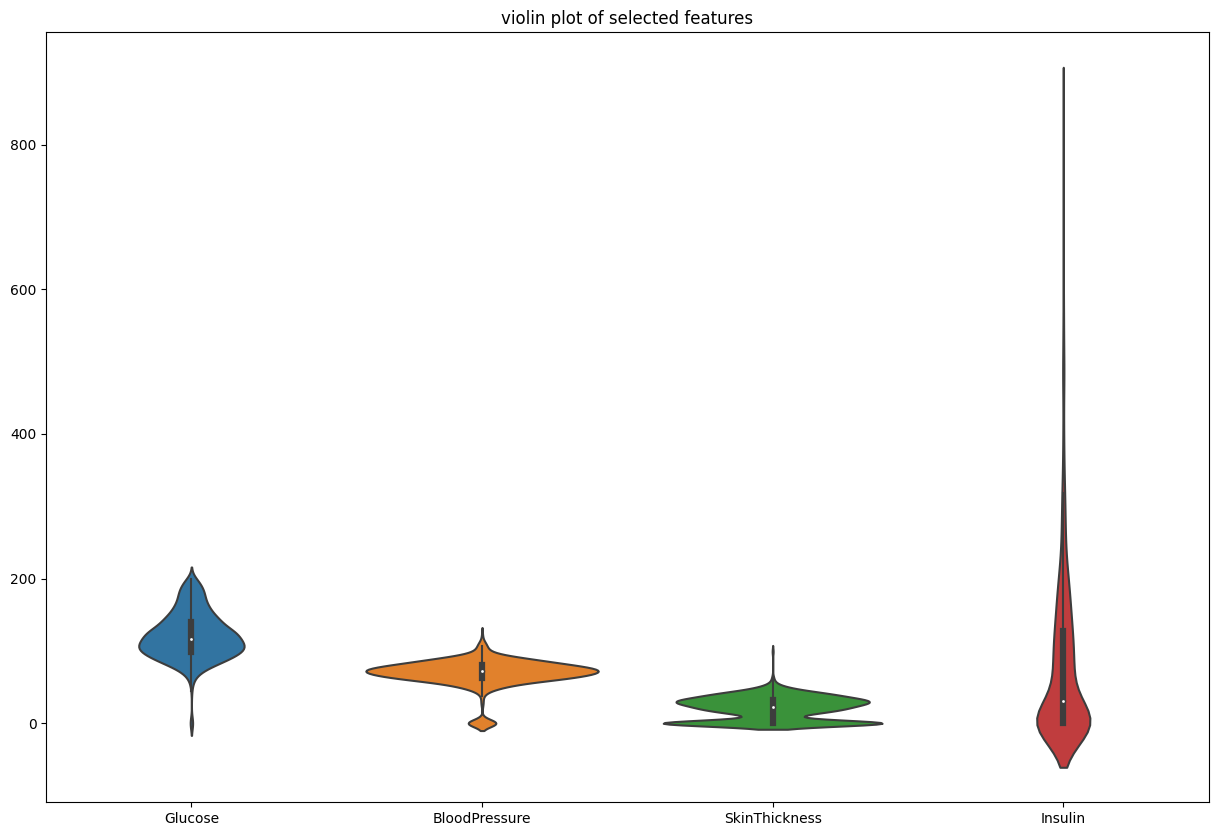

In [28]:
plt.figure(figsize=(15,10))
sns.violinplot(data=data[selected_columns])
plt.title("violin plot of selected features")
plt.show()

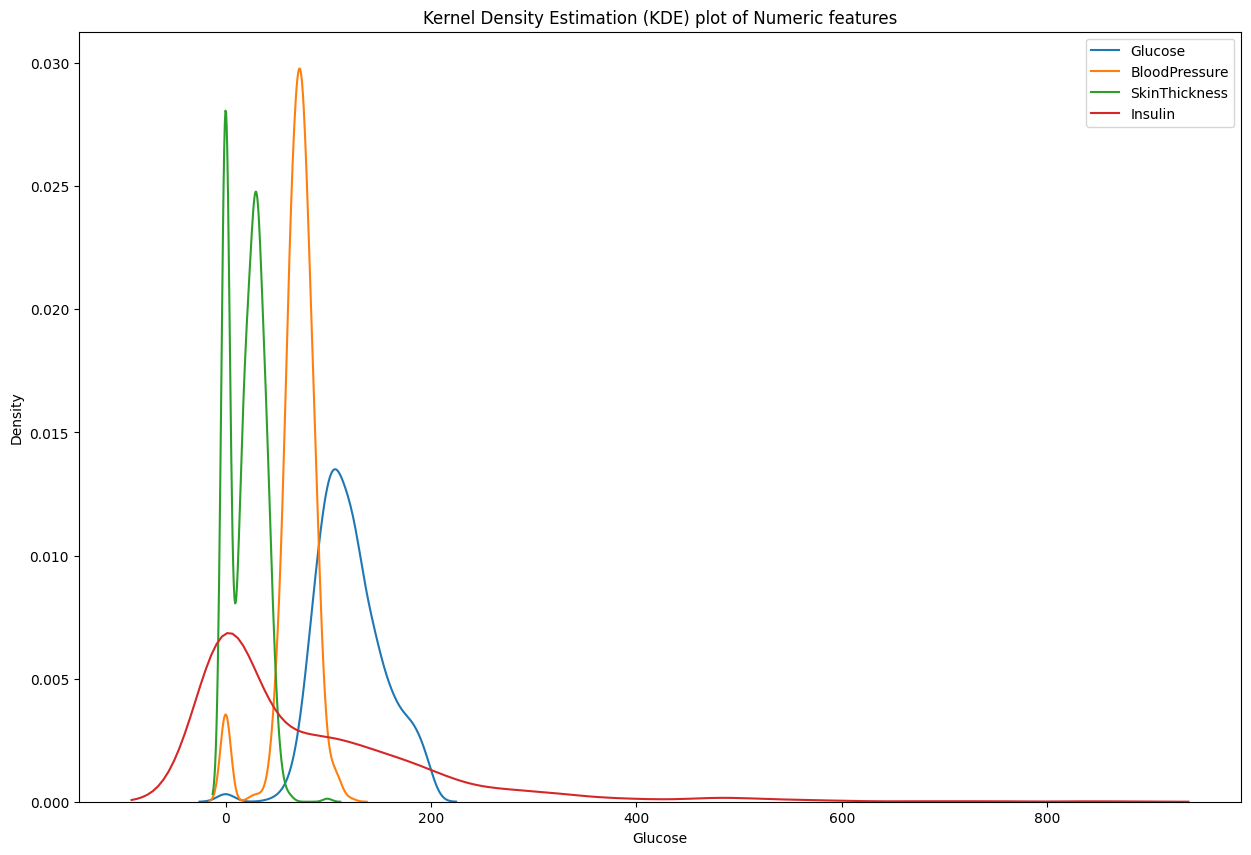

In [29]:
plt.figure(figsize=(15,10))
for column in selected_columns:
  sns.kdeplot(data[column],label=column)
plt.title("Kernel Density Estimation (KDE) plot of Numeric features")
plt.legend()
plt.show()

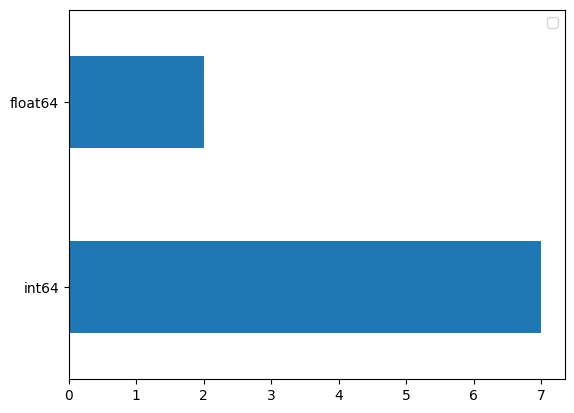

In [30]:
figsize=(15,2)
data.dtypes.value_counts().plot(kind='barh')
plt.legend()
plt.show()

In [31]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [32]:
data.dtypes.value_counts()

int64      7
float64    2
dtype: int64

In [33]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

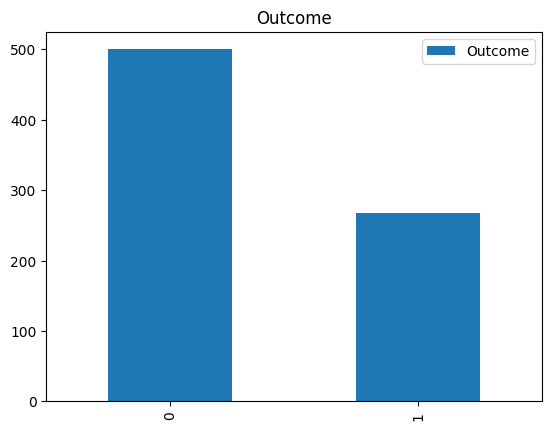

In [34]:
data['Outcome'].value_counts().plot(kind='bar')
plt.legend()
plt.title('Outcome')
plt.show()

In [35]:
outcome=(data['Outcome'].value_counts()/data['Outcome'].shape)*100
outcome

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [36]:
balanced_data=100-outcome
balanced_data

0    34.895833
1    65.104167
Name: Outcome, dtype: float64

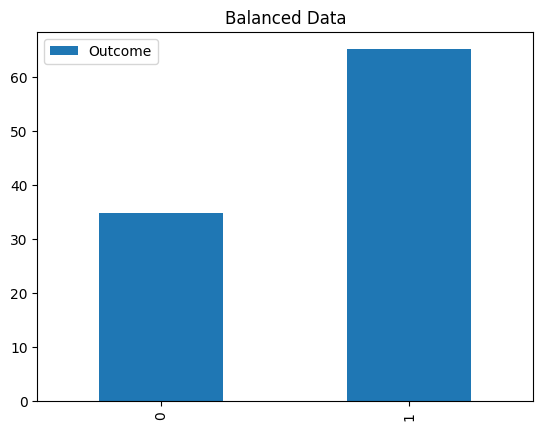

In [37]:
balanced_data.plot(kind='bar')
plt.legend()
plt.title('Balanced Data')
plt.show()

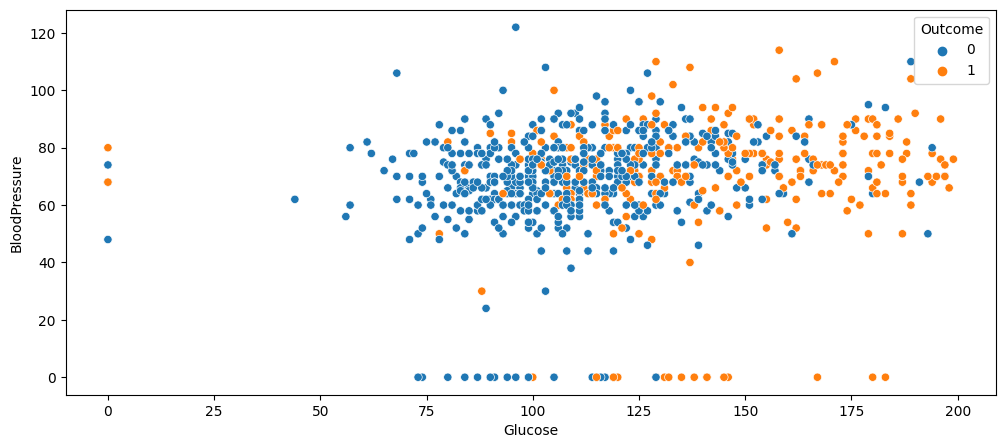

In [38]:
plt.figure(figsize=(12,5))
sns.scatterplot(x="Glucose",y='BloodPressure',hue="Outcome",data=data)
plt.show()

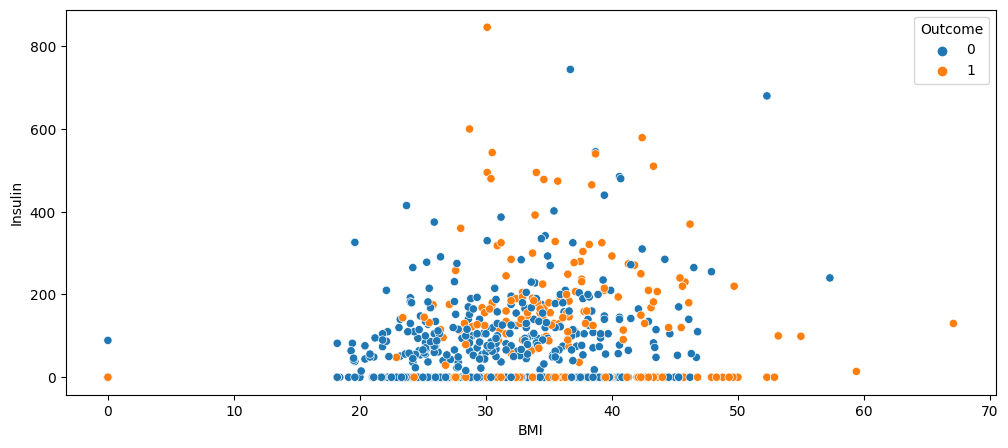

In [39]:
plt.figure(figsize=(12,5))
sns.scatterplot(x="BMI",y='Insulin',hue="Outcome",data=data)
plt.show()

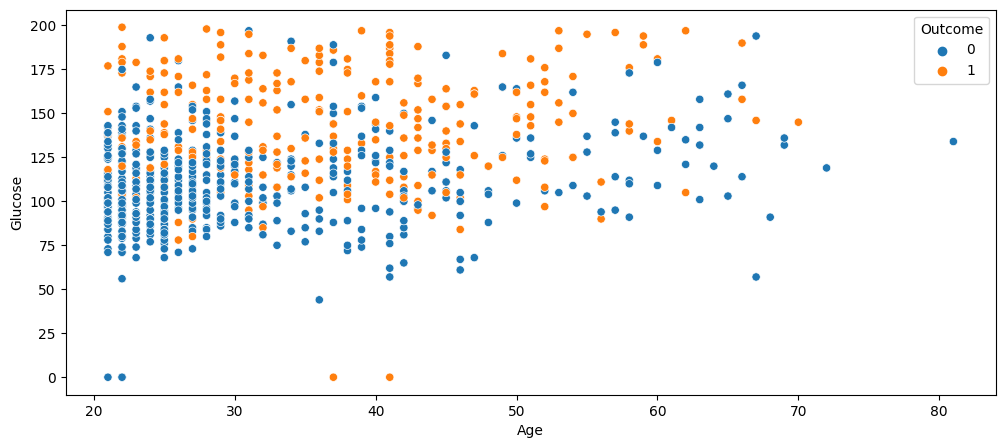

In [40]:
plt.figure(figsize=(12,5))
sns.scatterplot(x="Age",y='Glucose',hue="Outcome",data=data)
plt.show()

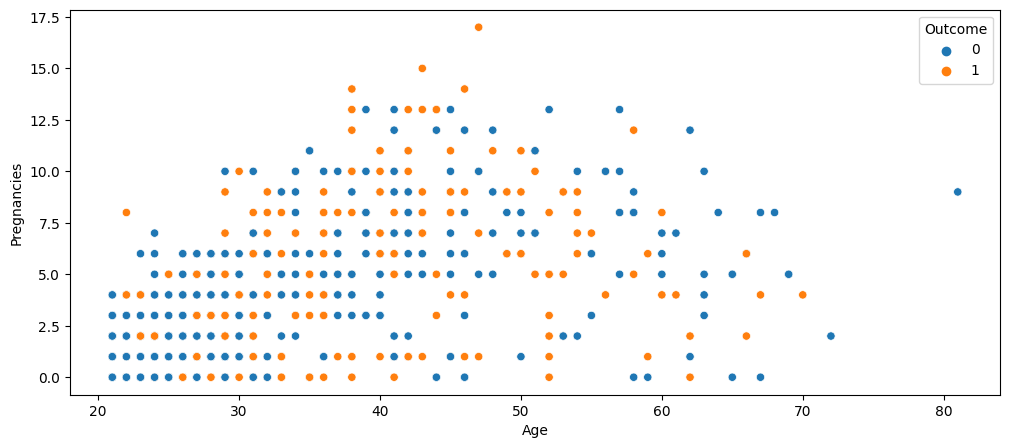

In [41]:
plt.figure(figsize=(12,5))
sns.scatterplot(x="Age",y='Pregnancies',hue="Outcome",data=data)
plt.show()

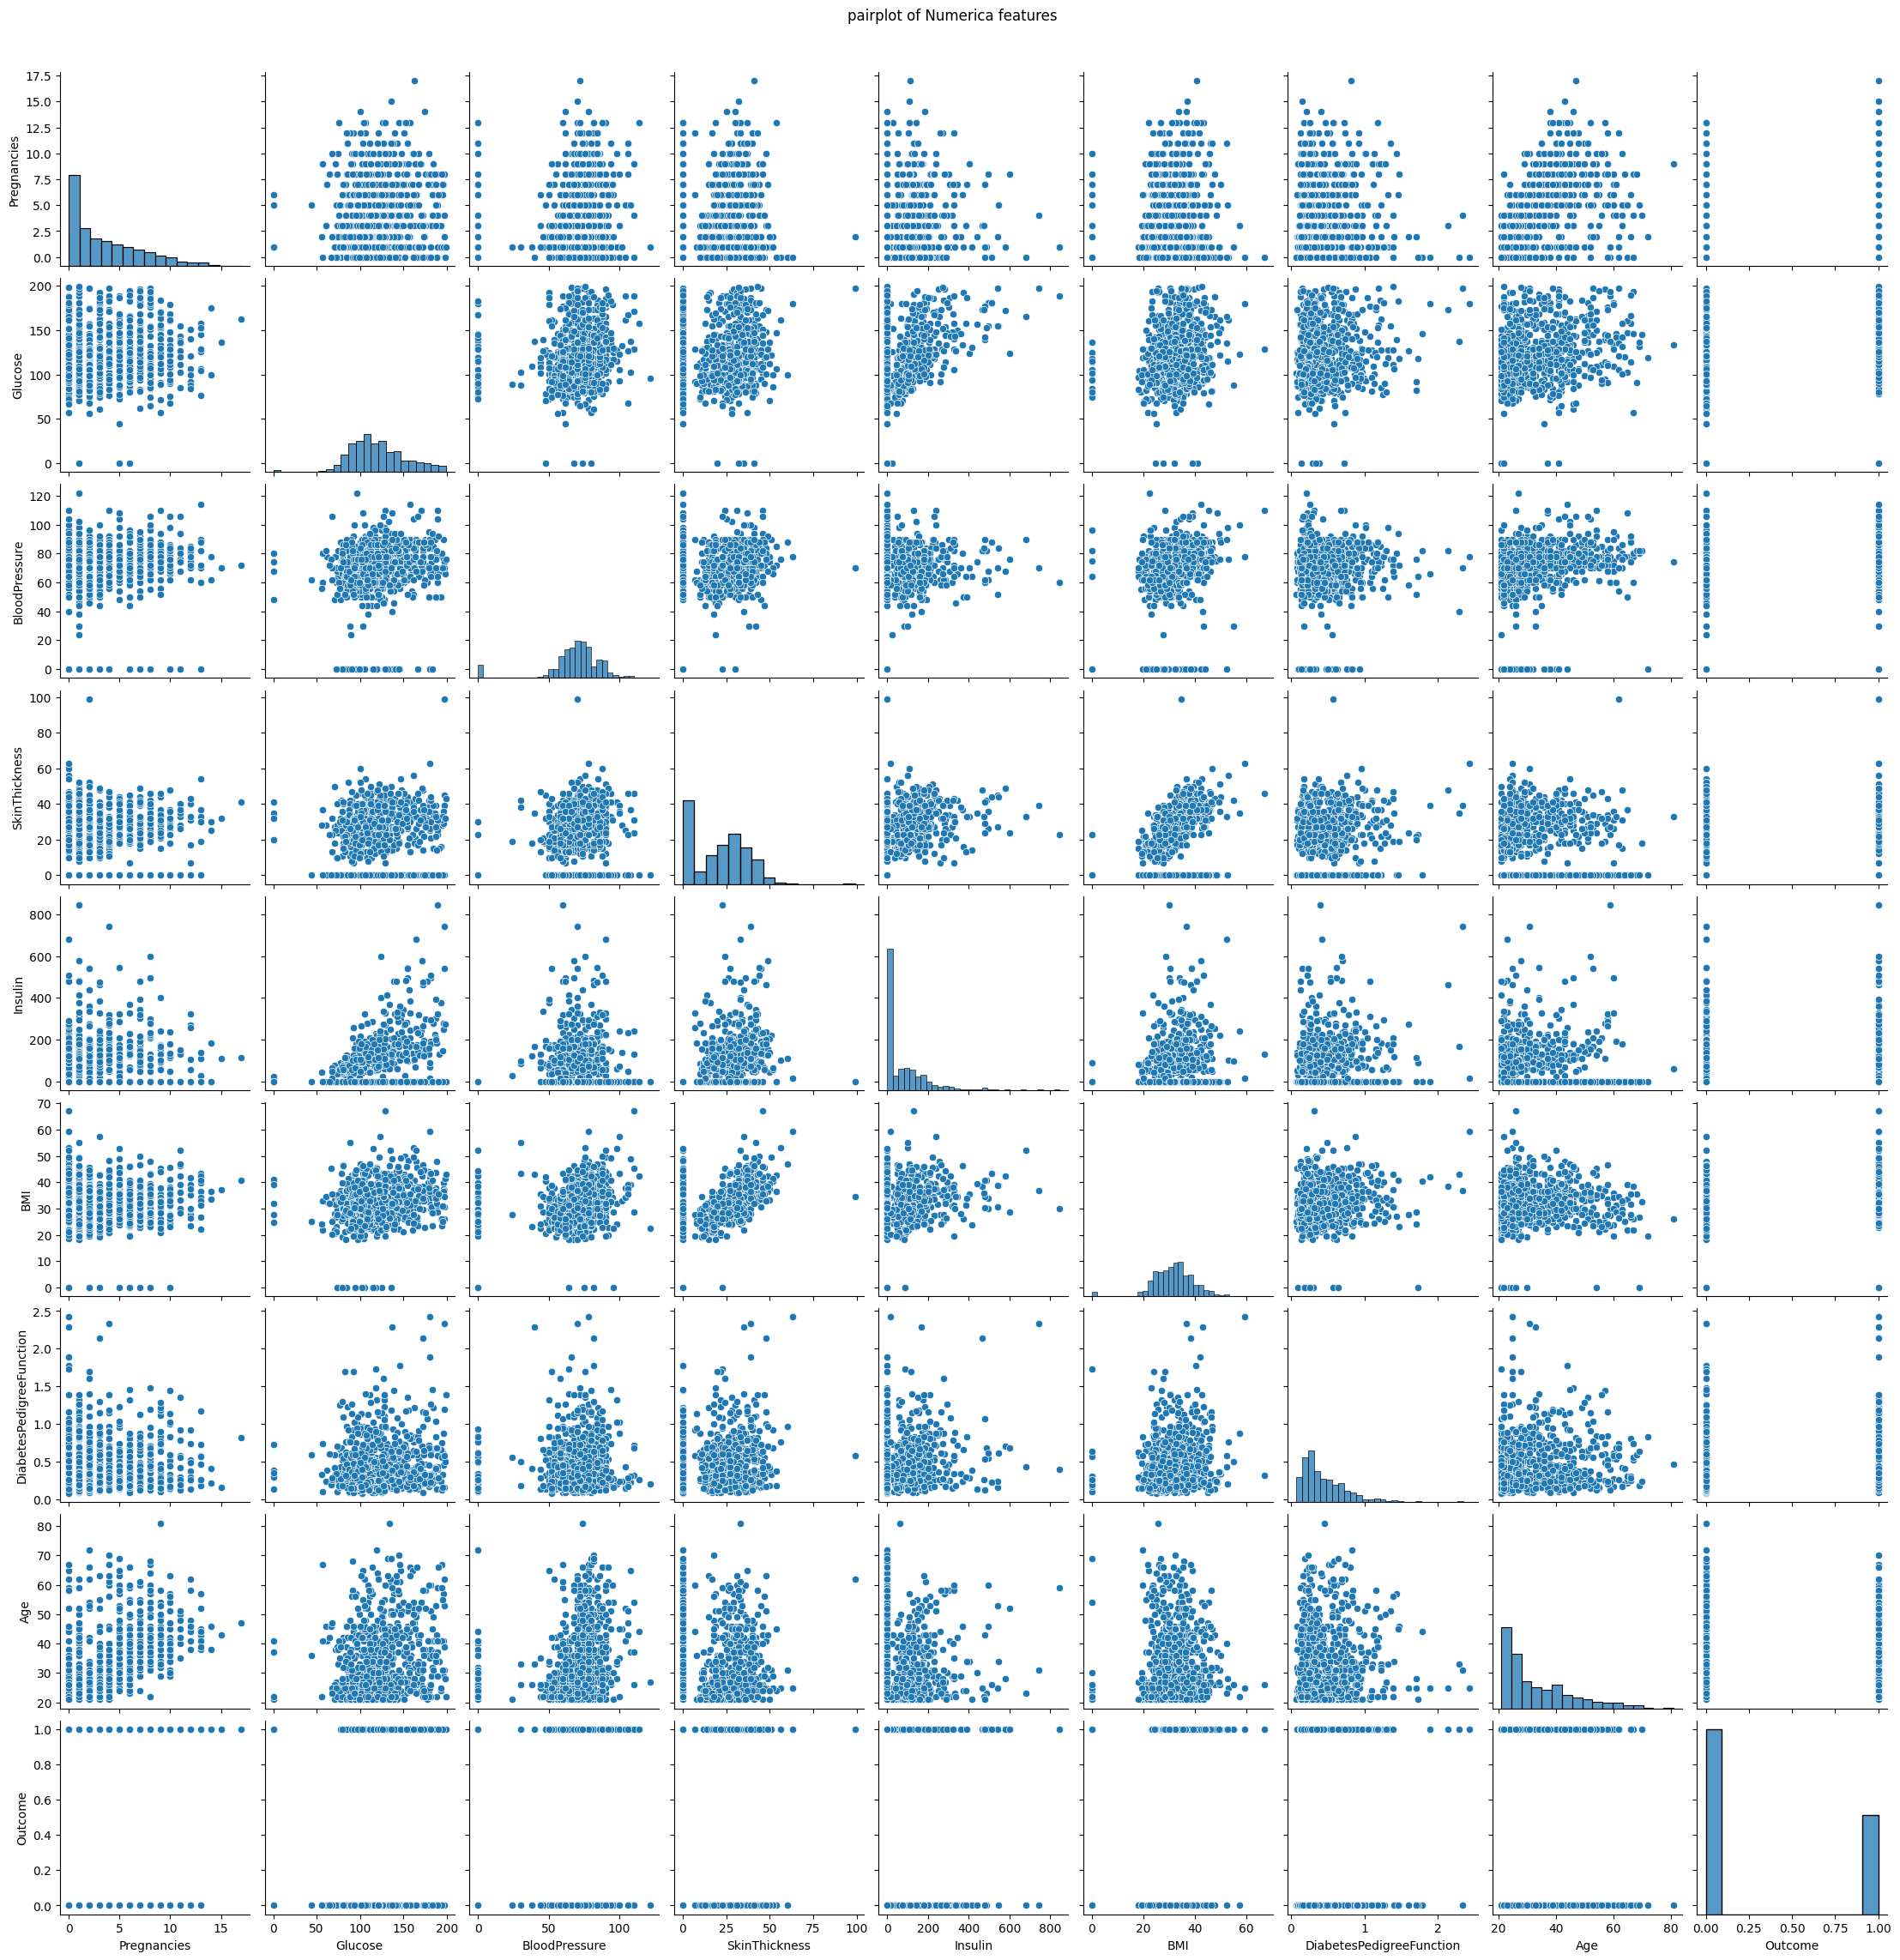

In [42]:
sns.pairplot(data)
plt.suptitle("pairplot of Numerica features",y=1.02)
plt.show()

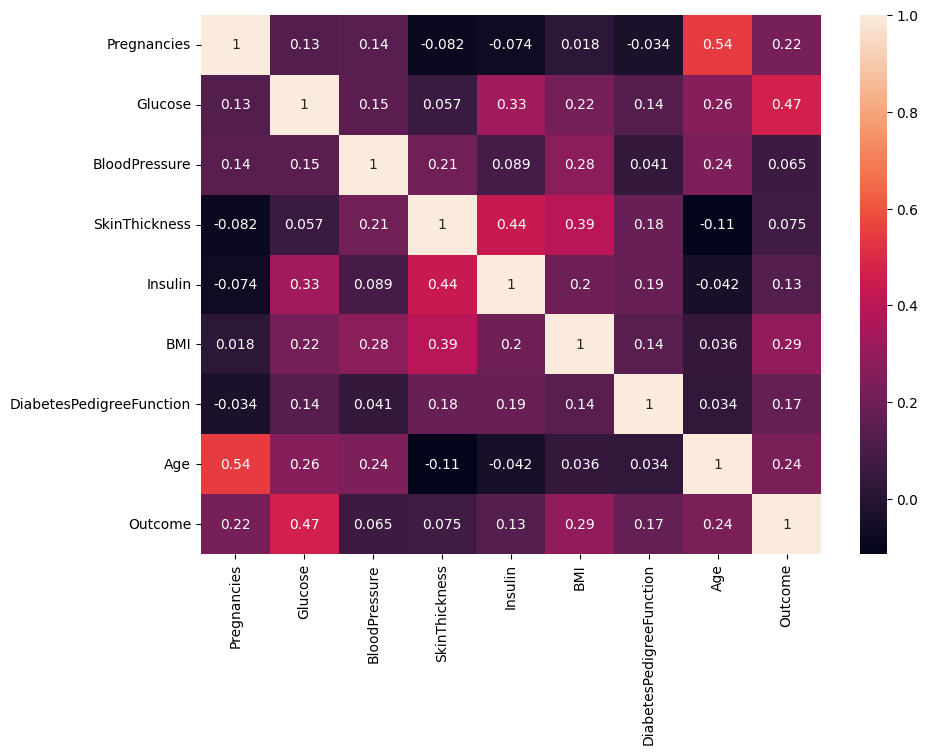

In [43]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [44]:
new_x=data.drop(['Outcome','BloodPressure'],axis=1).values
new_y=data.Outcome.values

In [45]:
trainx,testx,trainy,testy=train_test_split(new_x,new_y,test_size=0.2,random_state=10)

In [46]:
print("Before OverSampling, counts of label '1': {}".format(sum(trainy == 1)))

print("Before OverSampling, counts of label '0': {} \n".format(sum(trainy == 0)))

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state =63)

trainx_res,trainy_res = sm.fit_resample(trainx,trainy.ravel())

print('After OverSampling, the shape of train_X: {}'.format(trainx_res.shape))

print('After OverSampling, the shape of train_y: {} \n'.format(trainy_res.shape))


print("After OverSampling, counts of label '1': {}".format(sum(trainy_res == 1)))

print("After OverSampling, counts of label '0': {}".format(sum(trainy_res == 0)))


Before OverSampling, counts of label '1': 209
Before OverSampling, counts of label '0': 405 

After OverSampling, the shape of train_X: (810, 7)
After OverSampling, the shape of train_y: (810,) 

After OverSampling, counts of label '1': 405
After OverSampling, counts of label '0': 405


In [47]:
logreg=LogisticRegression(solver='liblinear',random_state=123)

In [48]:
logreg.fit(trainx_res,trainy_res)

LogisticRegression(random_state=123, solver='liblinear')

In [49]:
prediction=logreg.predict(testx)

In [50]:
print("Accuracy Score",accuracy_score(testy,prediction))
print("Mean_Squared_error",mean_squared_error(testy,prediction))

Accuracy Score 0.7597402597402597
Mean_Squared_error 0.24025974025974026


In [52]:
print("confusion matrix",confusion_matrix(testy,prediction))

confusion matrix [[72 23]
 [14 45]]


In [53]:
print(classification_report(testy,prediction))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        95
           1       0.66      0.76      0.71        59

    accuracy                           0.76       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.76      0.76       154



AUC: 0.838


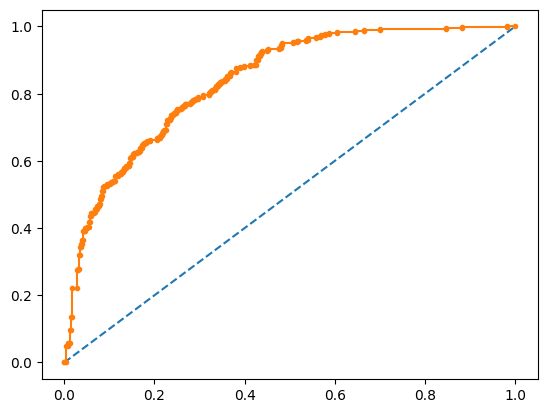

In [54]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = logreg.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

In [56]:
rf=RandomForestClassifier(random_state=42,max_depth=5)

In [57]:
rf.fit(trainx_res,trainy_res)

RandomForestClassifier(max_depth=5, random_state=42)

In [58]:
rf_predict=rf.predict(testx)

In [59]:
print("Accuracy score",accuracy_score(testy,rf_predict))
print("Mean squared score",mean_squared_error(testy,rf_predict))

Accuracy score 0.7337662337662337
Mean squared score 0.2662337662337662


In [61]:
param_grid={'n_estimators':[100,400,200,300],'criterion':['gini','entropy'],'max_depth':[1,2,3],'min_samples_split':[2,4,3],'min_samples_leaf':[1,2,3],
'max_leaf_nodes':[1,2,3],'max_samples':[2,4,3]}

In [62]:
grid=GridSearchCV( estimator=rf,param_grid=param_grid,n_jobs=-1,cv=5,verbose=2)

In [63]:

rf_grid=RandomForestClassifier(criterion= 'gini',max_depth= 2,max_leaf_nodes=3,max_samples=4,min_samples_leaf= 1,min_samples_split=3,

n_estimators= 400,random_state=42)

In [64]:

rf_grid.fit(trainx_res,trainy_res)
rf_grid_predict=rf_grid.predict(testx)

In [65]:
print("ACcuracy score",accuracy_score(testy,rf_grid_predict))
print("Mean Squared Score",mean_squared_error(testy,rf_predict))

ACcuracy score 0.7402597402597403
Mean Squared Score 0.2662337662337662


In [67]:
print((confusion_matrix(testy,prediction)))

[[72 23]
 [14 45]]


AUC: 0.941


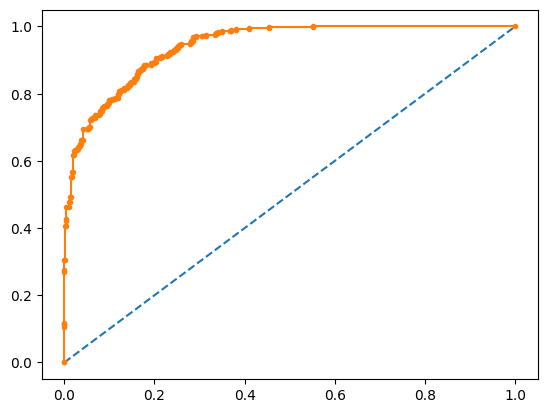

In [68]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = rf.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

In [69]:
dc=DecisionTreeClassifier(random_state=42)

In [72]:
dc.fit(trainx_res,trainy_res)
dc_pred=dc.predict(testx)

In [73]:
print('Accuracy_score -',accuracy_score(testy,dc_pred))
print('Mean_squared_error -',mean_squared_error(testy,dc_pred))

Accuracy_score - 0.6948051948051948
Mean_squared_error - 0.3051948051948052


In [74]:
dc_param_grid={'splitter':["best", "random"],'criterion':['gini','entropy'],'max_depth':[1,2,3],
'min_samples_split':[1,2,3],'min_samples_leaf':[1,2,3],'max_leaf_nodes':[1,2,3]}

In [75]:
import warnings

warnings.filterwarnings('ignore')

dc_grid=GridSearchCV(estimator=dc,param_grid=dc_param_grid,n_jobs=-1,cv=5,verbose=2)

dc_grid.fit(trainx_res,trainy_res)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'max_leaf_nodes': [1, 2, 3],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [1, 2, 3],
                         'splitter': ['best', 'random']},
             verbose=2)

In [76]:
dc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_leaf_nodes': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [77]:
dc_final=DecisionTreeClassifier(criterion= 'gini', max_depth=2,max_leaf_nodes=4,min_samples_leaf= 1,
min_samples_split= 2,splitter='best',random_state=42)

In [80]:
dc_final.fit(trainx_res,trainy_res)
dc_final_pred=dc_final.predict(testx)


In [81]:
print('Accuracy_score -',accuracy_score(testy,dc_final_pred))
print('Mean_squared_error -',mean_squared_error(testy,dc_final_pred))

Accuracy_score - 0.6883116883116883
Mean_squared_error - 0.3116883116883117


In [82]:
print((confusion_matrix(testy,dc_final_pred)))

[[73 22]
 [26 33]]


In [83]:
print((classification_report(testy,dc_final_pred)))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75        95
           1       0.60      0.56      0.58        59

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.68      0.69      0.69       154



In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:

knn=KNeighborsClassifier(n_neighbors=4)

In [87]:
knn.fit(trainx_res,trainy_res)

KNeighborsClassifier(n_neighbors=4)

In [88]:
knn_pred=knn.predict(testx)

In [89]:
print('Accuracy_score -',accuracy_score(testy,knn_pred))
print('Mean_squared_error -',mean_squared_error(testy,knn_pred))

Accuracy_score - 0.6363636363636364
Mean_squared_error - 0.36363636363636365


In [90]:
print((confusion_matrix(testy,knn_pred)))

[[70 25]
 [31 28]]


In [91]:
print((classification_report(testy,knn_pred)))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71        95
           1       0.53      0.47      0.50        59

    accuracy                           0.64       154
   macro avg       0.61      0.61      0.61       154
weighted avg       0.63      0.64      0.63       154



AUC: 0.950


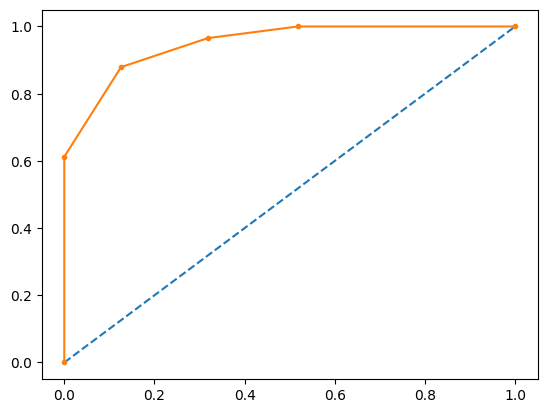

In [92]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = knn.predict_proba(trainx_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(trainy_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(trainy_res, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

In [93]:
Algorithms=['KNN','RandomForest','Decisiontree','logreg']

Accuracy_Score=[accuracy_score(testy,knn_pred),accuracy_score(testy,rf_grid_predict),accuracy_score(testy,dc_final_pred),accuracy_score(testy,prediction)]

# Create a DataFrame

accuracy_df = pd.DataFrame({'Algorithm': Algorithms, 'Accuracy': Accuracy_Score})

# Display the accuracy table

print(accuracy_df)

      Algorithm  Accuracy
0           KNN  0.636364
1  RandomForest  0.740260
2  Decisiontree  0.688312
3        logreg  0.759740


In [94]:
#creating the objects
logreg_cv = LogisticRegression(solver='liblinear',random_state=123)
dt_cv=DecisionTreeClassifier(random_state=123)
knn_cv=KNeighborsClassifier()
rf_cv=RandomForestClassifier(random_state=123)
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Random Forest'}
cv_models=[logreg_cv,dt_cv,knn_cv,rf_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, trainx, trainy, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.7752511898466421
Decision Tree Test Accuracy: 0.6923585404547858
KNN Test Accuracy: 0.7148863035430988
Random Forest Test Accuracy: 0.7621628767847699
